# Foundations for Machine Learning - Linear Algebra

We've briefly touched on the three aspects of machine learning (ML) defined by Tom Mitchell in his book _Machine Learning_ (1997) in past lectures:

1. Task (T)
2. Performance Measure (P)
3. Experience (E)

Our goal in machine learning is to construct a formal (i.e. mathematical) framework for these three ideas, and this will constitute a machine learning approach. Of course, the definition above is very broad, and says nothing about whether we find the machine learning algorithm figuratively _useful_ or _informative_ in some way. For example, just because we write a formal description of a P and calculate its value under T and E, doesn't mean the algorithm has to obtain the *best* value of P. Instead, just _improving_ according to P over the course of computing the algorithm could technically be called learning. To start devling into these ideas more, we need an example at least useful enough in the sense that it can help us gain some understanding about how one generally constructs T, P, and E, and one that also performs something we might consider _useful_ or _informative_. Alternatively, some algorithms are mathematically complex, and require a bit of study before we begin to understand how they work. Instead of diving directly into a machine learning approach, for this assignment we will be getting familiar with some mathematical concepts and the python libraries that we will be using to implement those mathematical concepts. Once we have these tools in hand, we will be prepared to begin exploring how these three elements T, P, and E are constructed, and how one might use them to solve engineering problems.

## Classification Tasks and Vectors

Generally, a classification task involves sorting experiences amongst a discrete set of options. One might, for example, think about the last week and separate each day into the classes of "good days" and "bad days". Or maybe one might listen to a song to determine which genre it belongs (pop, rock, r-n-b, reggae, etc.). Typically, you will use already-classified examples from the past to motivate your selection process and help you decide how to classify a new example. Being familiar with many rock songs might help one identify key features that are common to rock songs, and new songs which have these same features may be classified as rock then as well. However, different features might be used to identify pop songs, and if a song shares some features of both rock and pop then you will be forced to make a difficult decision. Songs which clearly have many features of the rock genre and few features of the pop genre might be desribed as more similar or _less distant_ to other songs in the rock genre, but also less similar or _more distant_ to songs in the pop genre. Notice that we are using the terms _similarity_ and _distance_ where one is generally taken to be roughly the inverse of the other. We often use the term _similarity_ to describe relationships between songs, and hence put similar songs into the same genre. However, due the inverse relationship distance has to similarity, it is also reasonable to say that we instead put songs that are less distant into the same genre. Using distance, it's easier to say if something does _not_ belong to a category. For example, if we say that a pop song doesn't sound like it belongs in the rock genre, we are saying that the song shares few features with other rock songs. That is, the pop song is distant from other rock songs. This concept is important because you have probably already studied and used some so-called _distance metrics_ in other math and CS courses, and we will be using these mathematical tools to describe relationships between experiences in machine learning tasks. For example, a common _distance metric_ is the Euclidean distance, defined between two vectors (or points) $\boldsymbol{x}$ and $\boldsymbol{y}$ to be: $\sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^2}$ where $\boldsymbol{x}$ and $\boldsymbol{y}$ are both vectors of length $n$.

Vectors play an important role in machine learning. We need a formal way to deliver experiences to a machine learning algorithm, and vectors provide a general mathematical way to do this, and they also help us understand how this mode of delivery shapes the learning and performance of the algorithms that we develop.

As a quick exercise, let's construct a couple of vectors and calculate the Euclidean distance between them:

In [1]:
# Prep the environment
import numpy as np

from sympy import *
init_printing(use_latex=True)

# New stuff!!
import scipy.spatial.distance as ssd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([1,1])
print(x)
y = np.array([0.5,1.5])
print(y)

[1 1]
[0.5 1.5]


Notice that we have chosen to use two vectors ($\boldsymbol{x}$ and $\boldsymbol{y}$) with a length of $n=2$ for this example.
We create each by constructing a python list of the vector elements and the passing the list to numpy's `array()` function. The reason why we don't use standard python lists should become apparent very soon.

Now, we can calculate their distance...

In [3]:
# Direct calculation with numpy
np.sqrt(np.sum(pow(x-y,2.0)))

Here we have utilized a nice property of numpy where arrays of the _same size/dimensions_ can have an operator or function apply to each of the *corresponding* elements in the arrays. For comparison, the $x-y$ operation would not be computable between two python lists (try it and you will see that it's _not supported_ under python). However, numpy recognizes that you would like to perform a subtraction operation for the two vectors _and_ that they have the same dimensions. Therefore, it knows to go through the corresponding elements in the vectors and subtract them one at a time, similar to if you had written a for-loop to iterate over the elements. It's a wonderful thing...

The end result of the subtraction operation is then another _temporary_ vector (let's call it $r$) of the same size ($n=2$) where $r_1 = x_1 - y_1$ and $r_2 = x_2 - y_2$. In a more python-like description, we would say `r[0] = x[0] - y[0]` and `r[1] = x[1] - y[1]` since numpy arrays are 0-indexed just like other python data structures.

Keep in mind that most mathematical descriptions that you see in these examples, as well as in textbooks, will also be 1-indexed. You will sometimes need to take care to remember that the data structures are 0-indexed instead.

Additionally, the `pow()` function is also applied over the $r$ array, and then the `sum()` function understands that it should sum over the values in the array provided to produce a single _scalar_ value which is finally passed to the `sqrt()` function for evaluation of the square-root.

We'll get back to vector data manipulation soon, but before we move on, let's look at a utility function from the scipy.spatial.distance package which can make this even easier:

## Distance and Similarity Calculations

In [4]:
# Using the scipy library spatial.distance
ssd.euclidean(x,y)

There are many functions in numpy and/or scipy which provide useful routines for common mathematical calculations like distances. You can see the list of distance functions [here](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).

Let's explore vectors and distance calculations a little more...

First note that the Euclidean distance is a special case of the so-called Minkowski distance which has an additional parameter, $p$:

${\left( \sum_{i=1}^{n} {\lvert x_i - y_i \rvert}^p \right)}^{\frac{1}{p}} = {\lVert \boldsymbol{x} - \boldsymbol{y} \rVert}_p$

If we set $p=2$, we obtain the Euclidean distance:

${\left( \sum_{i=1}^{n} {\vert x_i - y_i \rvert}^2 \right)}^{\frac{1}{2}} = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^2} = {\lVert \boldsymbol{x} - \boldsymbol{y} \rVert}_2$

The notation used here to denote the Minkowski distance is worth remembering.

Another common distance metric used in machine learning is the Manhattan distance, which is also a special case of the Minkowski distance when $p=1$:

${\left( \sum_{i=1}^{n} {\vert x_i - y_i \rvert}^1 \right)}^{\frac{1}{1}} = \sum_{i=1}^{n}\lvert x_{i}-y_{i} \rvert = {\lVert \boldsymbol{x} - \boldsymbol{y} \rVert}_1$

You can calculate these distances using the `minkowski()` function:

In [5]:
print('Euclidean: %f'%ssd.minkowski(x,y,2))
print('Manhattan: %f'%ssd.minkowski(x,y,1))

Euclidean: 0.707107
Manhattan: 1.000000


Another commonly used metric is the _cosine_ similarity. Note that this is not a distance function, but a similarity function. For the metrics above, similar vectors have _low_ distance from one another and dissimilar vectors have _high_ distance from one another. However, under the cosine similarity metric, similar items will have _high_ similarity and dissimilar items will have _low_ similarity.

Cosine similarity is defined as follows:
$\cos{\theta} = \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{{\lVert \boldsymbol{x} \rVert}_2 {\lVert \boldsymbol{y} \rVert}_2}$

where

${\lVert \boldsymbol{x} \lVert}_p = {\left( \sum_{i=1}^{n} {\lvert x_i \rvert}^p \right)}^\frac{1}{p}$ (so-called: p-norm)

and

$\boldsymbol{x} \cdot \boldsymbol{y} = \sum_{i=1}^{n} x_i y_i$ (so-called: dot-product)

and when $p=2$, we refer to this as the L2-norm of $\boldsymbol{x}$ (or somethimes simply the _length_ of the vector described by $\boldsymbol{x}$).

Let's calculate the cosine similarity between $\boldsymbol{x}$ and $\boldsymbol{y}$:

In [6]:
np.sum(x*y)/(np.sqrt(np.dot(x,x))*np.sqrt(np.dot(y,y)))

An alternative way to formulate the L2-norm is to take the square-root of the dot product between a vector and itself:

${{\lVert \boldsymbol{x} \rVert}_2} = \sqrt{\boldsymbol{x} \cdot \boldsymbol{x}}$

The value, $\theta$, represents the angle between the two vectors measured in _radians_. However, instead of solving for $\theta$, we usually are only interested in $\cos{\theta}$ since this value will be in the range $[-1,1]$ where vectors with high similarity will have a $\cos{\theta}$ close to 1, _orthogonal_ vectors will have a $\cos{\theta}$ close to 0, and vectors which nearly lie on the same line but point in _opposite_ directions will have a $\cos{\theta}$ of near -1.

Due to this property, another common distance metric is the _cosine distance_ which is defined to be $1-\cos{\theta}$, or:

$1 - \frac{\boldsymbol{x} \cdot \boldsymbol{y}}{{\lVert \boldsymbol{x} \rVert}_2 {\lVert \boldsymbol{y} \rVert}_2}$

This formulation allows for vectors which point in similar directions to have a distance of _zero_, while _orthgonal_ vectors have a distance of _one_, and vectors pointing in opposite directions will have a distance of _two_ (this is however, the maximum distance between two vectors using cosine distance). 

Also, the dot product, $\boldsymbol{x} \cdot \boldsymbol{y}$, alone has similar properties to cosine similarity so it is sometimes preferred due to the ease of computation using numpy's `dot()` function. We may investigate different ways to transform distance metrics into similarity metrics and vice-versa in future assignments.

Let's calculate cosine similarity and distance now...

In [7]:
print('Cosine similarity: %f'%(np.dot(x,y) /
                               (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))))
print('Cosine distance: %f'%ssd.cosine(x,y))

Cosine similarity: 0.894427
Cosine distance: 0.105573


As mentioned above, we can rewrite cosine similarity as follows:

$\boldsymbol{x} \cdot \boldsymbol{y} = {{\lVert \boldsymbol{x} \rVert}_2 {\lVert \boldsymbol{y} \rVert}_2} \cos {\theta}$

This means that the dot product ($\boldsymbol{x} \cdot \boldsymbol{y}$) is an _unscaled_ or _unnormalized_ version of the cosine similarity metric. You can compute it in two different ways:

In [8]:
# The dot product
print(np.sum(x*y))
print(np.dot(x,y))

2.0
2.0


The `dot()` function actually is very useful for working with matrices and tensors as well, and will come in handy later. For now, if you wanted to learn a little more about its capabilities, you could just ask for help in the notebook. This will look up the basic documentation provided for the function:

In [9]:
help(np.dot)

Help on function dot in module numpy:

dot(...)
    dot(a, b, out=None)
    
    Dot product of two arrays. Specifically,
    
    - If both `a` and `b` are 1-D arrays, it is inner product of vectors
      (without complex conjugation).
    
    - If both `a` and `b` are 2-D arrays, it is matrix multiplication,
      but using :func:`matmul` or ``a @ b`` is preferred.
    
    - If either `a` or `b` is 0-D (scalar), it is equivalent to :func:`multiply`
      and using ``numpy.multiply(a, b)`` or ``a * b`` is preferred.
    
    - If `a` is an N-D array and `b` is a 1-D array, it is a sum product over
      the last axis of `a` and `b`.
    
    - If `a` is an N-D array and `b` is an M-D array (where ``M>=2``), it is a
      sum product over the last axis of `a` and the second-to-last axis of `b`::
    
        dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
    Parameters
    ----------
    a : array_like
        First argument.
    b : array_like
        Second argument.
    out : 

## Matrices and Vectors

Now that we have worked with vectors a little, we will find ourselves needing to work with many of them at the same time. For that, we usually stack our vectors into a matrix so that we can utilize them for matrix-vector and matrix-matrix multiplication operations.

Let's make a new vector, $\boldsymbol{z}$, and then combine each of the 2-element vectors $\boldsymbol{x},\boldsymbol{y},\boldsymbol{z}$ into a 3-row matrix.

The result (we will call it: data) will be a 3x2 matrix.

In [10]:
# Make another vector
z = np.array([1.5,0.25])

# Combine all vectors -by row- to form a matrix
data = np.array([x,y,z])
data

array([[1.  , 1.  ],
       [0.5 , 1.5 ],
       [1.5 , 0.25]])

If you prefer, you can use sympy to print matrices and vectors for \LaTeX style rendering. Note that you will get column-wise vectors by default. You can always see the transpose instead using the `T` member. 

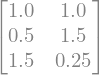

In [11]:
# Note that Matrix() was imported from sympy
Matrix(data)

In [12]:
# Same for vectors - but you will get a column-matrix
Matrix(x)

In [13]:
# Maybe you wante the transpose - use T?
Matrix(x).T

## Pairwise Distance Matrices

A common kind of matrix used in machine learning is the *pairwise distance* matrix. This matrix consists of distance calculations for $m$ different vectors obtained from an $m$ x $n$ data matrix.

Our matrix was 3x2, which means we have $m=3$ vectors, each of dimension $n=2$. What we want to do is compare each of the 3 vectors to itself and the other two. After doing this for all 3 vectors, we will have a 3x3 matrix which contains the distance from vector $i$ to $j$ where $i=1...n$ and $j=1...n$.

The `pdist()` function from sypy.spatial is useful for making this calculation, but to get the full $m$ x $m$ to display, we then convert the result into a square matrix using the `squareform()` function.

Here are some examples using the data we created above for a few distance metrics:

In [14]:
ssd.squareform(ssd.pdist(data,metric='euclidean'))

array([[0.        , 0.70710678, 0.90138782],
       [0.70710678, 0.        , 1.60078106],
       [0.90138782, 1.60078106, 0.        ]])

In [15]:
ssd.squareform(ssd.pdist(data,metric='minkowski',p=2))

array([[0.        , 0.70710678, 0.90138782],
       [0.70710678, 0.        , 1.60078106],
       [0.90138782, 1.60078106, 0.        ]])

In [16]:
ssd.squareform(ssd.pdist(data,metric='minkowski',p=1))

array([[0.  , 1.  , 1.25],
       [1.  , 0.  , 2.25],
       [1.25, 2.25, 0.  ]])

In [17]:
ssd.squareform(ssd.pdist(data,metric='cosine'))

array([[0.        , 0.10557281, 0.18626653],
       [0.10557281, 0.        , 0.53211228],
       [0.18626653, 0.53211228, 0.        ]])

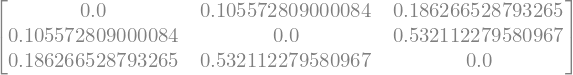

In [18]:
# Just to make it pretty...
Matrix(ssd.squareform(ssd.pdist(data,metric='cosine')))

# Matrix-Vector Operations

We will be using common linear algebra operations often for neural network computations.

One common operations are the matrix-vector product. I will show how to print the expression we are wanting to compute using sympy, but most of the time, I will _not_ ask you to do this for your assignments. Sympy, by default, will simplify expressions automatically, so it takes some work to turn off the simplication engine in order to use it for printing.

Nevertheless, let's try to compute a matrix-vector product using the numpy `dot()` function...

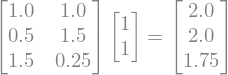

In [19]:
# Let's use sympy to print a pretty version of the operation..
Eq(MatMul(Matrix(data),Matrix(x),evaluate=False),
   Matrix(np.dot(data,x)),evaluate=False)

In [20]:
# Most of the time, you will simply use:
np.dot(data,x)

array([2.  , 2.  , 1.75])

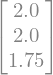

In [21]:
# And a simple pretty-print of the results...
Matrix(np.dot(data,x))

Note how numpy knows that `data` is a 3x2 array and `x` is a 2-dimensional vector. This means that it treats the vector as a 2x1 matrix for this operation. The result is therefore a 3x1, which is expressed more clearly in the pretty-printed version.

This property of numpy which allows it match vector, matrix, and other arrays of arbitrary dimension (tensors - we will see them later) by correspondingly sized dimensions will be useful.

Note what happens if we reverse the order of `data` and `x`:

In [22]:
np.dot(x,data)

ValueError: shapes (2,) and (3,2) not aligned: 2 (dim 0) != 3 (dim 0)

While numpy is smart enough to match corresponding dimensions when requested, you still have to formulate your computation in the order that makes sense for the array and matrix you are using.

In the case above, since numpy sees the `x` vector as a column vector, it has size 2x1, and trying to multply a 2x1 by a 3x2 doesn't work (the "inner" numbers need to match in the order of calculations).

So, just remember, numpy is *great*, but _order matters_...

## Matrix-Matrix operations

Numpy is also good for performing matrix-matrix operations (as well as vector-tensor, matrix-tensor, and tensor-tensor... we will do those later).

For now, we will calculate `data` times its transpose. That's a 3x2 times a 2x3, so the result is a 3x3. Again, I will use sympy to show the math, but most of the time the `dot()` function is what you will be using...

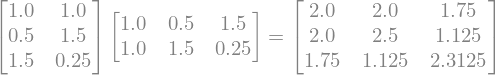

In [23]:
Eq(MatMul(Matrix(data),Matrix(data).T,evaluate=False),
   Matrix(np.dot(data,data.T)),evaluate=False)

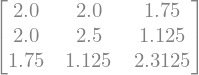

In [24]:
# Let's use numpy!
Matrix(np.dot(data,data.T))

Notice, this is equivalent to calculating the pairwise dot-product between all three vectors!

With a little more work, we can calculate the pairwise cosine distances like we did using the `pdist()` function and the `metric=cosine` argument, but using only pure numpy...

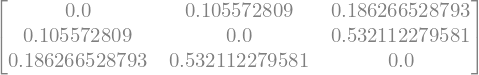

In [25]:
def mynorm(a_vector):
    return np.sqrt(np.dot(a_vector,a_vector))

A = np.round(
    1.0 - (np.dot(data,data.T) / np.dot(
    np.reshape(np.apply_along_axis(mynorm,1,data),[3,1]),
    np.reshape(np.apply_along_axis(mynorm,1,data),[1,3]))),12)
Matrix(A)

There are a lot of new functions being used here. Some are fairly straight-forward to understand, such as `round()` which simply rounds numbers to the specified number of digits following the decimal point (in this case, 12). Also, the `dot()` and `T` operations you have already seen.

However, another useful tool is the `apply_along_axis()` function. This function allows us to call a function and apply it to individual vectors (or even sub-matrices if we are using tensors) in a matrix. In the case of the cosine distance, we need to calculate the vector norms in the denominator of the equation. First, we create a function, `mynorm` which takes a vector as input, and calculates the norm (a scalar) for that vector. We use this as the first argument to apply_along_axis since this is the function we need to apply to the vectors in `data`. Next, we know we need to apply the function to the vectors in each _row_ and the first dimension of a matrix specifies the number of _rows_ in that matrix. Thus, if we want to apply the function to each row, we select the first dimension (0) as the second argument. Finally, we supply the matrix containing the vectors we are performing the operation on: `data`. The end result is a 3-element vector which contains the _lengths_ (vector norms) of each of the 3 vectors in the matrix.

The `reshape()` function then comes in handy for forming the 3 elements into first a 3x1 matrix, and then a 1x3 matrix (one matrix for each call). By multiplying the two matrices together with `dot()` we have calculated all pairs of vector norms (a 3x3 matrix - the denominators in the cosine distance equation).

We then use `dot()` to calculate the dot products for all vectors and divide it by the pairwise norm matrix before we finally subtract the result from 1, and pass it to `round()` to eliminate some numerical round-off error accumulation. (Feel free to remove the `round()` function to observe the left-over values along the diagonal, the values of which are very near, but not quite, zero.

## Matrix Decompositions

Finally, let's perform some matrix factorizations (or often matrix decomposition). This is similar to finding the factors of a number, like how you can get $12=4*3$ or $12=2*6$. Each pair is a factorization of the number $12$.

For matrix factorization, we want a combination of matrices that can be multiplied together to obtain a given matrix, $\boldsymbol{A}$.

We will explore how to use these operations in neural networks and machine learning in the future. For now, just learn how to compute them.

Let's start with *Eigen decomposition*, where we want to factor a square and (in most cases) symmetric matrix $\boldsymbol{A}$ (which we computer above) into:

$\boldsymbol{A} = \boldsymbol{Q} \boldsymbol{\Lambda} \boldsymbol{Q}^\intercal$

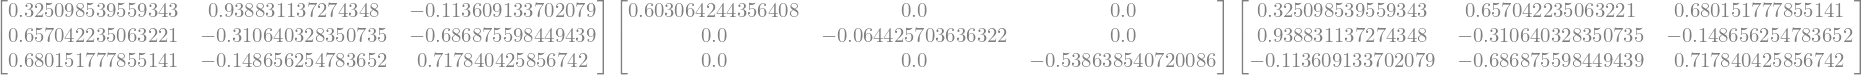

In [26]:
L,Q = np.linalg.eig(A)

MatMul(Matrix(Q),Matrix(np.diag(L)),Matrix(Q).T,evaluate=False)

The result is a 3x3 matrix of eigen vectors, $\boldsymbol{Q}$, and a _diagonal_ matrix of eigen values, $\boldsymbol{\Lambda}$ (which I have assigned to L for simplicity).

You can obtain the original matrix, $A$, (within a little numerical rounding error) by multiplying the parts together as prescribed above:

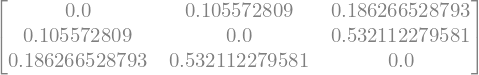

In [27]:
Matrix(np.round(np.dot(np.dot(Q,np.diag(L)),Q.T),12))

Another common decomposition is the *singular value decomposition*, which can be applied to $m$ x $n$ (i.e. rectangular) matrices:

$\boldsymbol{A} = \boldsymbol{U} \boldsymbol{\Sigma} \boldsymbol{V}^\intercal$

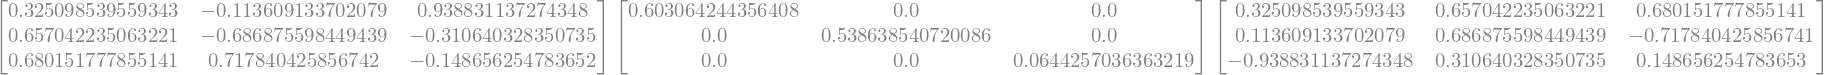

In [28]:
U,S,V = np.linalg.svd(A,full_matrices=True)

MatMul(Matrix(U),Matrix(np.diag(S)),Matrix(V),evaluate=False)

The result is a 3x3 matrix of left-singular vectors, $\boldsymbol{U}$, and a _diagonal_ matrix of singular values, $\boldsymbol{\Sigma}$ (which I have assigned to S for simplicity), and a 3x3 matrix of right-singular vectors, $\boldsymbol{V}$. (However, note that V is already in transposed form when returned by numpy.)

You can obtain the original matrix, $\boldsymbol{A}$, (within a little numerical rounding error) by multiplying the parts together as prescribed above:

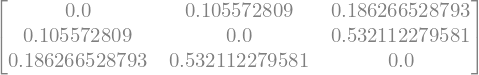

In [29]:
Matrix(np.round(np.dot(np.dot(U,np.diag(S)),V),12))